# Importing Necessarry Libraries 

In [1]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# authentication
# these are my credentials for authentication from developers app(https://developer.twitter.com/en/portal/projects/1496233127722860552/apps/23469414/keys)
consumerKey = 'Xd8sONHrOM0iEq98zx7MKGoU2'
consumerSecret = 'XTC374wBkLPjPFvCsXDgOfbBl9njwOPQ3l0Dbq2CF34ust5J8s'
accessToken = '1490710778860777474-IStEjWn7Vkqavam06SbkgyoITz83l2'
accessTokenSecret = 'fFvlUuROEBJBBtTNhIZCZ8LlXAneDvIRHMnp8CFRTZFiK'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search_tweets, q=searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

In [5]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,The Lebanese activists worked with Jack Sweene...
1,"It started with a letter to Elon Musk, then a ..."
2,@IntEngineering Hey Elon--any thoughts for thi...
3,@_hamstercoin_coin #hamstercoin #hamsterswap...
4,@shushanblansh @narecus @elonmusk Exactly:) \n...
...,...
95,Try de go church.\n -Elon musk
96,Elon Musk must have had a cracked PR team a co...
97,elon got nothing on her https://t.co/sd6MZzGb2V
98,"@elonmusk I'm Elon Musk : genius, richest man ..."


# Cleaning Procedure 

In [6]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [7]:
tweet_df.head()

,0,cleaned_data
0,The Lebanese activists worked with Jack Sweene...,The Lebanese activists worked with Jack Sweene...
1,"It started with a letter to Elon Musk, then a ...",It started with a letter to Elon Musk then a T...
2,@IntEngineering Hey Elon--any thoughts for thi...,Hey Elon any thoughts for this wonderful machine
3,@_hamstercoin_coin #hamstercoin #hamsterswap...,hamstercoin coin hamstercoin hamsterswap elon ...
4,@shushanblansh @narecus @elonmusk Exactly:) \n...,Exactly I think Elon has now been compromised ...


In [8]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [9]:
tweet_df.head()

,0,cleaned_data
0,The Lebanese activists worked with Jack Sweene...,The Lebanese activists worked with Jack Sweene...
1,"It started with a letter to Elon Musk, then a ...",It started with a letter to Elon Musk then a T...
2,@IntEngineering Hey Elon--any thoughts for thi...,Hey Elon any thoughts for this wonderful machine
3,@_hamstercoin_coin #hamstercoin #hamsterswap...,hamstercoin coin hamstercoin hamsterswap elon ...
4,@shushanblansh @narecus @elonmusk Exactly:) \n...,Exactly I think Elon has now been compromised ...


In [15]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [14]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elbrusgasimov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elbrusgasimov/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [17]:
tweet_df['cleaned_data'].values

array(['the lebanese activist worked with jack sweeney creator of the twitter bot tracking the movement of elon musk s p',
       'it started with a letter to elon musk then a twitter reply to a reuters story now the tongan worst hit by tsunam',
       'hey elon any thought for this wonderful machine',
       'hamstercoin coin hamstercoin hamsterswap elon musk said that hamster ha mad skillz hamster cheese',
       'exactly i think elon ha now been compromised with am gov member mi citing his tweet',
       'hamstercoin coin hamstercoin hamsterswap elon musk said that hamster ha mad skillz hamster cheese',
       'elon musk spotted handing out cash at kanye west donda listening event kanyewest donda donda elonmusk',
       'elon musk want steam game to work on amd navi powered tesla infotainment system wed feb',
       'musk family but i can t see elon there',
       'elon must is atheist or agnostic',
       'you mean like deliver an ev truck where s elon s ripoff of the halo warthog'

In [18]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [19]:
tweet_df['cleaned_data'].values

array(['lebanese activist worked jack sweeney creator twitter bot tracking movement elon musk p',
       'started letter elon musk twitter reply reuters story tongan worst hit tsunam',
       'hey elon thought wonderful machine',
       'hamstercoin coin hamstercoin hamsterswap elon musk said hamster ha mad skillz hamster cheese',
       'exactly think elon ha compromised gov member mi citing tweet',
       'hamstercoin coin hamstercoin hamsterswap elon musk said hamster ha mad skillz hamster cheese',
       'elon musk spotted handing cash kanye west donda listening event kanyewest donda donda elonmusk',
       'elon musk want steam game work amd navi powered tesla infotainment system wed feb',
       'musk family see elon', 'elon must atheist agnostic',
       'mean like deliver ev truck elon ripoff halo warthog',
       'place whenever elon pull anywhere camera',
       'elon musk capable leading team raising family consider republic',
       'tsla owner think speak majority saying p

# Polarity of the Reviews

In [20]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [21]:
tweet_df['polarity'].value_counts()

Neutral              57
Weakly Positive      16
Positive             11
Strongly Positive     5
Negative              5
Weakly Negative       3
Strongly Negative     2
Name: polarity, dtype: int64

In [22]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [23]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,70):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


In [24]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

0.036875541125541124

In [25]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [26]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)



In [27]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on elon by analyzing 100 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
9.00% people thought it was positive
11.00% people thought it was weakly positive
3.00% people thought it was strongly positive
5.00% people thought it was negative
1.00% people thought it was weakly negative
2.00% people thought it was strongly negative
38.00% people thought it was neutral


In [28]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

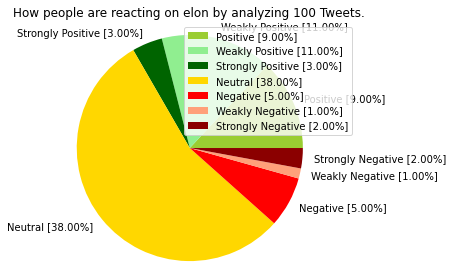

In [29]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()